<a href="https://colab.research.google.com/github/HimanshuRajput013/Testline-Assignment/blob/main/TestLine_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
def process_quiz_data(url):
    response = requests.get(url)
    data = response.json()
    questions = data['quiz']['questions']
    quiz_data = []

    for question in questions:
        # Find correct answer
        correct_answer = None
        incorrect_id = {}
        for option in question['options']:
            if option['is_correct']:
                correct_id = option["id"]
                correct_id_topic = option["description"]
            else:
                incorrect_id[option["id"]] = option["description"]
        question_data = {
            'question_id': question['id'],
            'correct_id': correct_id,
            'correct_topic': correct_id_topic,
            'incorrect_id': incorrect_id,
            'topic': question['topic'],
        }
        quiz_data.append(question_data)
    df = pd.DataFrame(quiz_data)
    return df

# URL of the quiz data
quiz_url = "https://www.jsonkeeper.com/b/LLQT"
quiz_df = process_quiz_data(quiz_url)
quiz_df.head(128)




,question_id,correct_id,correct_topic,incorrect_id,topic
0,1827,7323,Epithelial tissue,"{7321: 'Muscular tissue', 7322: 'Fluid connect...",structural organisation in animals
1,1828,7328,basement membrane,"{7325: 'large extracellular matrix', 7326: 'co...",structural organisation in animals
2,1829,7330,bronchioles and fallopian tubes,"{7329: 'Eustachian tube and stomach lining', 7...",structural organisation in animals
3,1830,7336,air sacs of lungs,"{7333: 'stomach', 7334: 'intestine', 7335: 'tr...",structural organisation in animals
4,1831,7340,squamous epithelium,"{7337: 'cuboidal epithelium', 7338: 'columnar ...",structural organisation in animals
...,...,...,...,...,...
123,1960,7857,Remain unchanged,"{7854: 'Become decalcified', 7855: 'Become sof...",structural organisation in animals
124,1961,7858,Sensory neurons,"{7859: 'Motor neurons', 7860: 'Interneurons', ...",structural organisation in animals
125,1962,7865,Interneurons,"{7862: 'Sensory', 7863: 'Motor', 7864: 'Effere...",structural organisation in animals
126,1963,7868,Blood,"{7866: 'Areolar tissue', 7867: 'Adipose tissue...",structural organisation in animals


In [84]:
def extract_quiz_data(item):
    """Extract relevant fields and convert submitted_at to Date & Hour."""
    timestamp = pd.to_datetime(item["submitted_at"]).timestamp()
    readable_time = pd.to_datetime(timestamp, unit="s")

    return {
        "quiz_id": item["quiz_id"],
        "user_id": item["user_id"],
        "submitted_date": readable_time.strftime("%Y-%m-%d"),  # Extract date
        "submitted_hour": readable_time.strftime("%H:%M:%S"),  # Extract hour
        "score": item["score"],
        "accuracy": item["accuracy"],
        "final_score": item["final_score"],
        "negative_score": item["negative_score"],
        "correct_answers": item["correct_answers"],
        "incorrect_answers": item["incorrect_answers"],
        "total_questions": item["total_questions"],
        "mistakes_corrected": item["mistakes_corrected"],
        "initial_mistake_count": item["initial_mistake_count"],
        "response_map": json.dumps(item["response_map"]),
        "title": item["quiz"]["title"],
        "topic": item["quiz"]["topic"]
    }


def access_data(url):
    """Fetch and process quiz data from the given URL."""
    response = requests.get(url)
    data = response.json()

    # Process list or single dictionary
    if isinstance(data, list):
        extracted_data = [extract_quiz_data(item) for item in data]
    elif isinstance(data, dict):
        extracted_data = [extract_quiz_data(data)]
    else:
        raise ValueError("Unexpected data format. Expected dict or list of dicts.")
    df = pd.DataFrame(extracted_data)
    df['submitted_datetime'] = pd.to_datetime(df['submitted_date'] + ' ' + df['submitted_hour'])
    df['total_topic_accuracy%'] = ((df['correct_answers'] / df['total_questions']) * 100).round(2)
    df.loc[:, 'accuracy'] = df['accuracy'].str.rstrip('%').astype(float)
    df['accuracy'] = pd.to_numeric(df['accuracy'], errors='coerce')
    df.rename(columns={'accuracy': 'accuracy%'}, inplace=True)
    df['topic'] = df['topic'].str.strip()
    df = df.drop(['submitted_date', 'submitted_hour'], axis=1)
    df = df.sort_values(by='submitted_datetime', ascending=False)

    return df


In [85]:
sumbit_url = "https://api.jsonserve.com/rJvd7g"
sumbit_df = access_data(sumbit_url)
sumbit_df.head()



,quiz_id,user_id,score,accuracy%,final_score,negative_score,correct_answers,incorrect_answers,total_questions,mistakes_corrected,initial_mistake_count,response_map,title,topic,submitted_datetime,total_topic_accuracy%
0,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,32,80.0,30.0,2.0,8,2,128,6,8,"{""1837"": 7363, ""1848"": 7407, ""1852"": 7423, ""18...",Structural Organisation in Animals and Plants (7),Structural Organisation in Animals,2025-01-17 10:21:29,6.25


In [86]:
history_url = "https://api.jsonserve.com/XgAgFJ"
history_df = access_data(history_url)
history_df.head(15)

,quiz_id,user_id,score,accuracy%,final_score,negative_score,correct_answers,incorrect_answers,total_questions,mistakes_corrected,initial_mistake_count,response_map,title,topic,submitted_datetime,total_topic_accuracy%
0,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,108,90.0,105.0,3.0,27,3,100,9,12,"{""2523"": 10109, ""2529"": 10130, ""2533"": 10149, ...",Human Physiology (15),Body Fluids and Circulation,2025-01-17 10:00:18,27.00
1,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,92,100.0,92.0,0.0,23,0,23,3,3,"{""48"": 192, ""49"": 197, ""50"": 199, ""51"": 203, ""...",Human Physiology PYQ,Body Fluids and Circulation,2025-01-17 09:47:44,100.00
2,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,116,96.0,115.0,1.0,29,1,100,11,12,"{""2523"": 10109, ""2525"": 10117, ""2528"": 10127, ...",Human Physiology (15),Body Fluids and Circulation,2025-01-16 14:43:19,29.00
3,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,36,90.0,35.0,1.0,9,1,23,1,2,"{""49"": 197, ""52"": 208, ""53"": 212, ""54"": 217, ""...",Human Physiology PYQ,Body Fluids and Circulation,2025-01-16 14:30:11,39.13
4,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,36,31.0,16.0,20.0,9,20,100,0,20,"{""2521"": 10099, ""2523"": 10107, ""2532"": 10145, ...",Human Physiology (15),Body Fluids and Circulation,2025-01-15 15:04:39,9.00
5,57,YcDFSO4ZukTJnnFMgRNVwZTE4j42,40,38.0,24.0,16.0,10,16,89,0,16,"{""3043"": 12184, ""3044"": 12186, ""3046"": 12194, ...",Reproduction,Human Reproduction,2025-01-15 10:27:12,11.24
6,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,36,50.0,27.0,9.0,9,9,23,0,9,"{""48"": 193, ""49"": 197, ""50"": 202, ""51"": 203, ""...",Human Physiology PYQ,Body Fluids and Circulation,2025-01-15 10:06:46,39.13
7,20,YcDFSO4ZukTJnnFMgRNVwZTE4j42,12,30.0,5.0,7.0,3,7,59,0,7,"{""473"": 1893, ""474"": 1898, ""475"": 1901, ""487"":...",PRINCIPLES OF INHERITANCE AND VARIATION PYQ,principles of inheritance and variation,2025-01-13 10:40:03,5.08
8,24,YcDFSO4ZukTJnnFMgRNVwZTE4j42,76,100.0,76.0,0.0,19,0,20,4,4,"{""770"": 3084, ""771"": 3085, ""772"": 3091, ""773"":...",MICROBES IN HUMAN WELFARE PYQ,microbes in human welfare,2025-01-13 07:58:12,95.00
9,18,YcDFSO4ZukTJnnFMgRNVwZTE4j42,40,100.0,40.0,0.0,10,0,22,0,0,"{""612"": 2451, ""613"": 2454, ""614"": 2460, ""619"":...",REPRODUCTIVE HEALTH PYQ,reproductive health,2025-01-13 07:42:40,45.45


In [38]:
def weak_topic_insights(df):
    df = df.head(5).copy()  # Explicitly create a copy to avoid SettingWithCopyWarning
    # Identify weak topics
    df.loc[:, 'accuracy_weak_topic'] = df.apply(lambda x: x['topic'] if x['accuracy%'] < 80 else None, axis=1)
    weak_topics_per_user = df.groupby(['user_id', 'accuracy_weak_topic'], dropna=True).size().reset_index(name='count')
    return weak_topics_per_user

def total_weak_topic_insights(df):
    df = df.head(5).copy().reset_index(drop=True)  # Ensure a copy with reset index

    # Ensure 'total_topic_accuracy%' is numeric
    df.loc[:, 'total_topic_accuracy%'] = df['total_topic_accuracy%'].astype(float)

    # Assign weak topic flag
    df.loc[:, 'total_accuracy_weak_topic'] = df.apply(
        lambda x: x['topic'].strip() if x['total_topic_accuracy%'] < 80 else None, axis=1
    )

    # Drop NaN values in 'total_accuracy_weak_topic' before grouping
    df_filtered = df.dropna(subset=['total_accuracy_weak_topic']).copy()

    # Convert column to string safely
    df_filtered.loc[:, 'total_accuracy_weak_topic'] = df_filtered['total_accuracy_weak_topic'].astype(str)

    # Group by user_id and weak topic, summing occurrences
    total_weak_topics_per_user = (
        df_filtered.groupby(['user_id', 'total_accuracy_weak_topic'], as_index=False)
        .size()
        .rename(columns={'size': 'count'})
    )

    return total_weak_topics_per_user


In [39]:
weak_topics=weak_topic_insights(history_df)
weak_topics

,user_id,accuracy_weak_topic,count
0,YcDFSO4ZukTJnnFMgRNVwZTE4j42,Body Fluids and Circulation,1


In [40]:
total_weak_topics=total_weak_topic_insights(history_df)
total_weak_topics

,user_id,total_accuracy_weak_topic,count
0,YcDFSO4ZukTJnnFMgRNVwZTE4j42,Body Fluids and Circulation,4


In [110]:
def mean_accuracy(df,topic_accuracy):
  df = df.head(5)
  grouped_df = df.groupby(['user_id', 'topic'])[topic_accuracy].mean().reset_index()
  pivot_df = grouped_df.pivot(index='user_id', columns='topic', values=topic_accuracy)
  plt.figure(figsize=(12, 6))
  pivot_df.plot(kind='bar', stacked=False, figsize=(8, 8))
  plt.title(f"Mean {topic_accuracy} by User and Topic")
  plt.xlabel("User ID")
  plt.ylabel(f"Mean {topic_accuracy}")
  plt.xticks(rotation=90)
  plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()

  return plt.show()

<Figure size 1200x600 with 0 Axes>

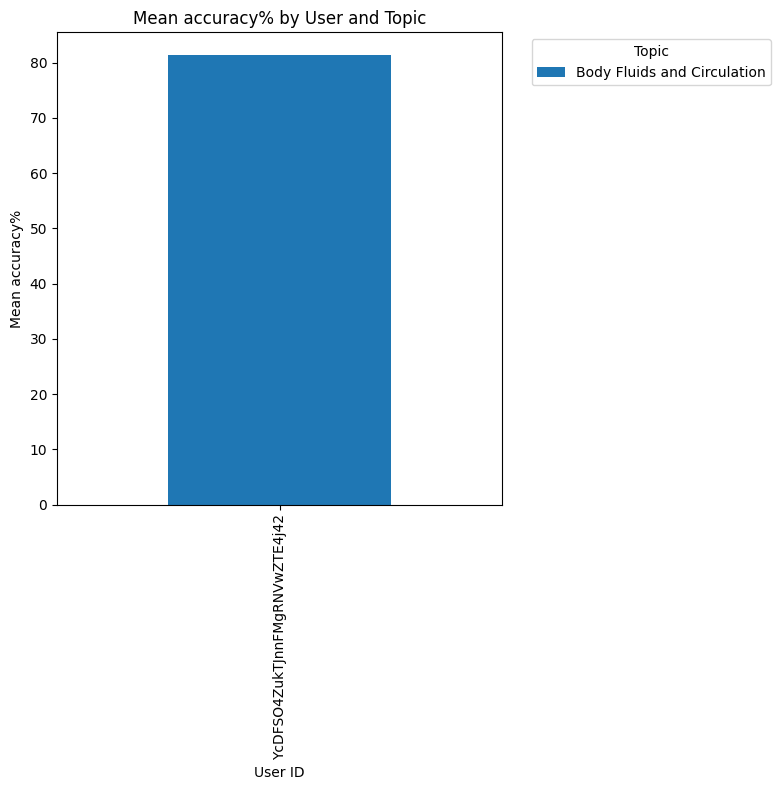

<Figure size 1200x600 with 0 Axes>

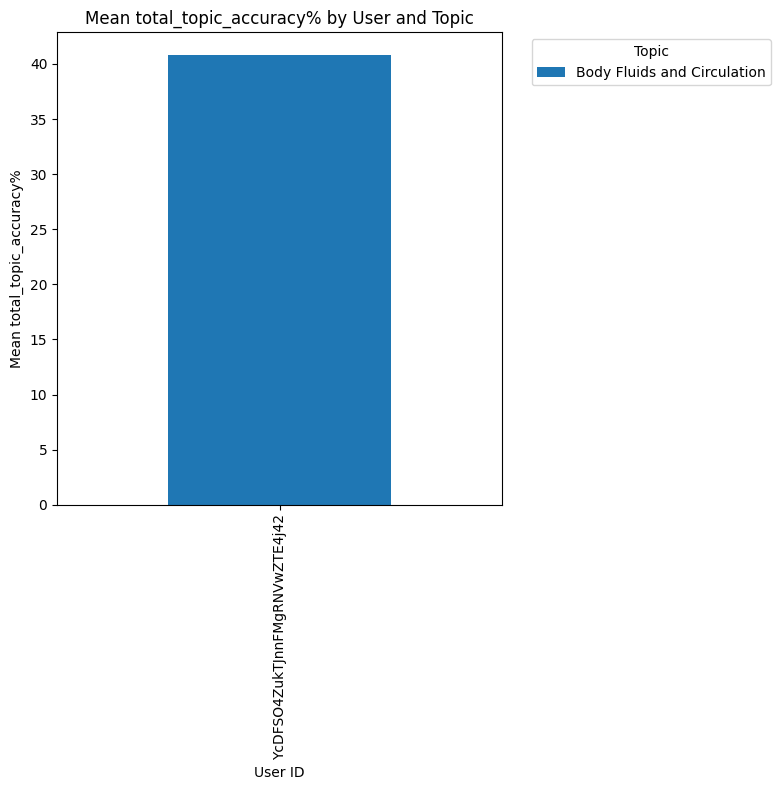

In [111]:
mean_accuracy(history_df,'accuracy%')
mean_accuracy(history_df,'total_topic_accuracy%')

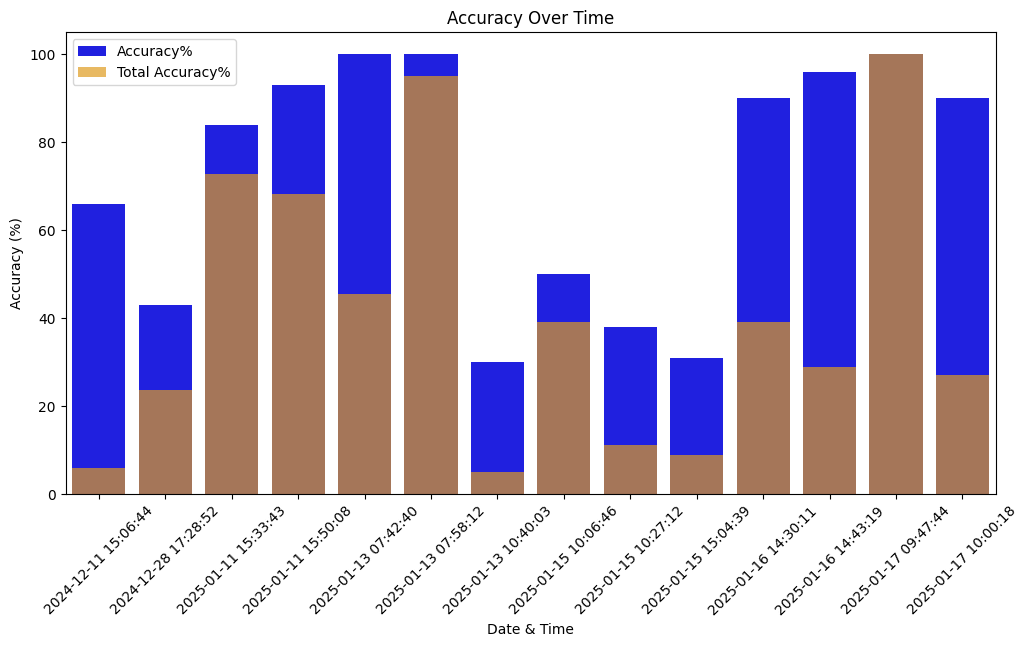

In [120]:

plt.figure(figsize=(12, 6))

sns.barplot(x=history_df['submitted_datetime'], y=history_df['accuracy%'], color='blue', label='Accuracy%')
sns.barplot(x=history_df['submitted_datetime'], y=history_df['total_topic_accuracy%'], color='orange', alpha=0.7, label='Total Accuracy%')

# Formatting
plt.xticks(rotation=45)
plt.xlabel('Date & Time')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Over Time')
plt.legend()
plt.show()

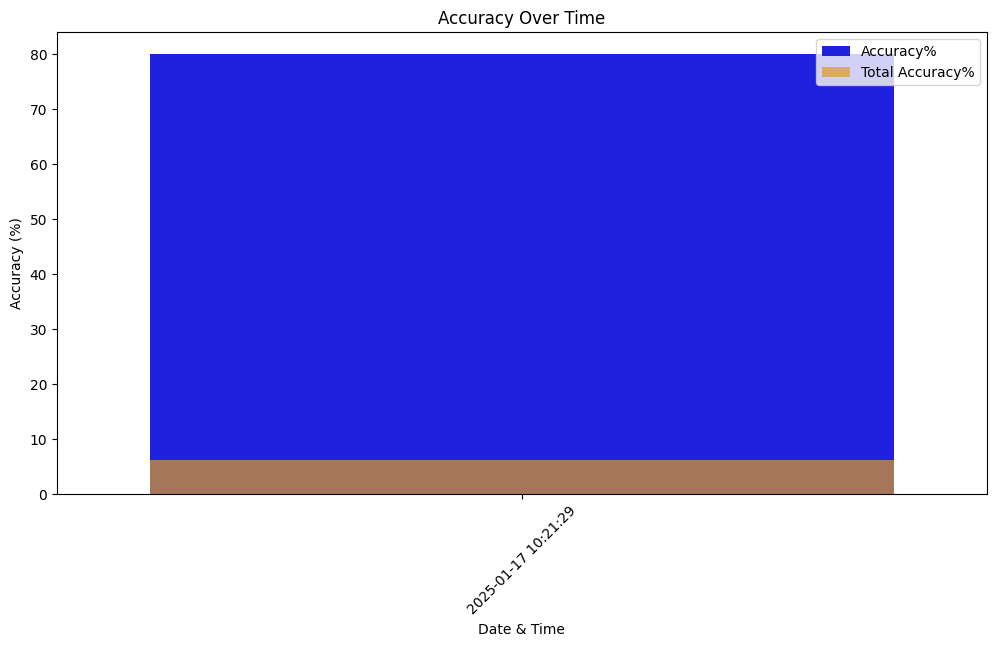

In [119]:

# Plot the bar chart
plt.figure(figsize=(12, 6))

sns.barplot(x=sumbit_df['submitted_datetime'], y=sumbit_df['accuracy%'], color='blue', label='Accuracy%')
sns.barplot(x=sumbit_df['submitted_datetime'], y=sumbit_df['total_topic_accuracy%'], color='orange', alpha=0.7, label='Total Accuracy%')

# Formatting
plt.xticks(rotation=45)
plt.xlabel('Date & Time')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Over Time')
plt.legend()
plt.show()

##Reccomadation System

In [124]:
import pandas as pd

def weak_topic_insights(df, user_id):
    df = df[df['user_id'] == user_id].copy()  # Filter data for the given user_id
    if df.empty:
        return "No past history data found."

    # Identify weak topics
    df.loc[:, 'accuracy_weak_topic'] = df.apply(lambda x: x['topic'] if x['accuracy%'] < 80 else None, axis=1)
    weak_topics_per_user = df.groupby(['user_id', 'accuracy_weak_topic'], dropna=True).size().reset_index(name='count')

    return weak_topics_per_user

def total_weak_topic_insights(df, user_id):
    df = df[df['user_id'] == user_id].copy()  # Filter data for the given user_id
    if df.empty:
        return "No past history data found."

    df.loc[:, 'total_topic_accuracy%'] = df['total_topic_accuracy%'].astype(float)
    df.loc[:, 'total_accuracy_weak_topic'] = df.apply(
        lambda x: x['topic'].strip() if x['total_topic_accuracy%'] < 80 else None, axis=1
    )

    df_filtered = df.dropna(subset=['total_accuracy_weak_topic']).copy()
    df_filtered.loc[:, 'total_accuracy_weak_topic'] = df_filtered['total_accuracy_weak_topic'].astype(str)

    total_weak_topics_per_user = (
        df_filtered.groupby(['user_id', 'total_accuracy_weak_topic'], as_index=False)
        .size()
        .rename(columns={'size': 'count'})
    )

    return total_weak_topics_per_user

def get_weak_topics(history_df, submit_df, user_id):
    history_df = history_df.head(5)
    weak_topics = weak_topic_insights(history_df, user_id)
    total_weak_topics = total_weak_topic_insights(history_df, user_id)

    weak_topics_submit = weak_topic_insights(submit_df, user_id)
    total_weak_topics_submit = total_weak_topic_insights(submit_df, user_id)

    if isinstance(weak_topics, str) and isinstance(weak_topics_submit, str):
        return "No past history data or submission data found."

    message = []

    if isinstance(weak_topics, pd.DataFrame) and not weak_topics.empty:
        for _, row in weak_topics.iterrows():
            message.append(f"You have weak topic '{row['accuracy_weak_topic']}' and {row['count']} times you scored less than 80% in history.")

    if isinstance(total_weak_topics, pd.DataFrame) and not total_weak_topics.empty:
        for _, row in total_weak_topics.iterrows():
            message.append(f"In total accuracy, you struggled with '{row['total_accuracy_weak_topic']}' {row['count']} times in history.")

    if isinstance(weak_topics_submit, pd.DataFrame) and not weak_topics_submit.empty:
        for _, row in weak_topics_submit.iterrows():
            message.append(f"You have weak topic '{row['accuracy_weak_topic']}' and {row['count']} times you scored less than 80% in submissions.")

    if isinstance(total_weak_topics_submit, pd.DataFrame) and not total_weak_topics_submit.empty:
        for _, row in total_weak_topics_submit.iterrows():
            message.append(f"In total accuracy, you struggled with '{row['total_accuracy_weak_topic']}' {row['count']} times in submissions.")

    return "\n".join(message) if message else "No weak topics found."




In [125]:
# Example Usage:
user_id = "YcDFSO4ZukTJnnFMgRNVwZTE4j42"
print(get_weak_topics(history_df, sumbit_df, user_id))

You have weak topic 'Reproductive Health' and 1 times you scored less than 80% in history.
You have weak topic 'Respiration and Gas Exchange' and 1 times you scored less than 80% in history.
In total accuracy, you struggled with 'Reproductive Health' 1 times in history.
In total accuracy, you struggled with 'Respiration and Gas Exchange' 1 times in history.
In total accuracy, you struggled with 'human health and disease' 1 times in history.
In total accuracy, you struggled with 'reproductive health' 2 times in history.
